In [1]:
from utils.results import *
import torch
import matplotlib.pyplot as plt
import json

In [2]:
# settings for the plots,
dataset= 'mvtec_loco'
run= "contamination_0"  
experiment=  "Exp_17_02_24-"#,"Exp0-r18",
#category= "juice_bottle"

RESPATH="results"
DATASET=os.path.join(RESPATH, dataset)  


with open('/home/bule/projects/UTRAD/configurations/mvtec_loco.json', 'r') as file:
    conf_loco = json.load(file)
print(list(conf_loco['anomaly_categories'].keys()))

['breakfast_box', 'juice_bottle', 'pushpins', 'screw_bag', 'splicing_connectors']


In [3]:
exp_name= "Exp_04_06_24"
category= "breakfast_box"
root= '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/'

with open('/home/bule/projects/UTRAD/configurations/mvtec_loco.json', 'r') as file:
    conf_loco = json.load(file)
print(list(conf_loco['anomaly_categories'].keys()))

run=1
logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')

category_list= list(conf_loco['anomaly_categories'].keys())
#category_list= ['breakfast_box', 'screw_bag']
run_range= np.arange(1,6)

res_df=[]
for category in category_list:
    print(category)
    logfile_paths= []
    for run in run_range:
        logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')
        if os.path.exists(logfile_path):
            logfile_paths.append(logfile_path)
        
    lastrow_df=last_rows_metric(logfile_paths)
    lastrow_df['category']= [category]*len(lastrow_df)
    res_df.append(lastrow_df)
    
res_df= pd.concat(res_df)
res_df['contamination']= ['0']*len(res_df)
res_df['setting']= ['clean']*len(res_df)


res_df.head()

['breakfast_box', 'juice_bottle', 'pushpins', 'screw_bag', 'splicing_connectors']
breakfast_box
juice_bottle
pushpins
screw_bag
splicing_connectors


,category,contamination,setting


['breakfast_box', 'juice_bottle', 'pushpins', 'screw_bag', 'splicing_connectors']


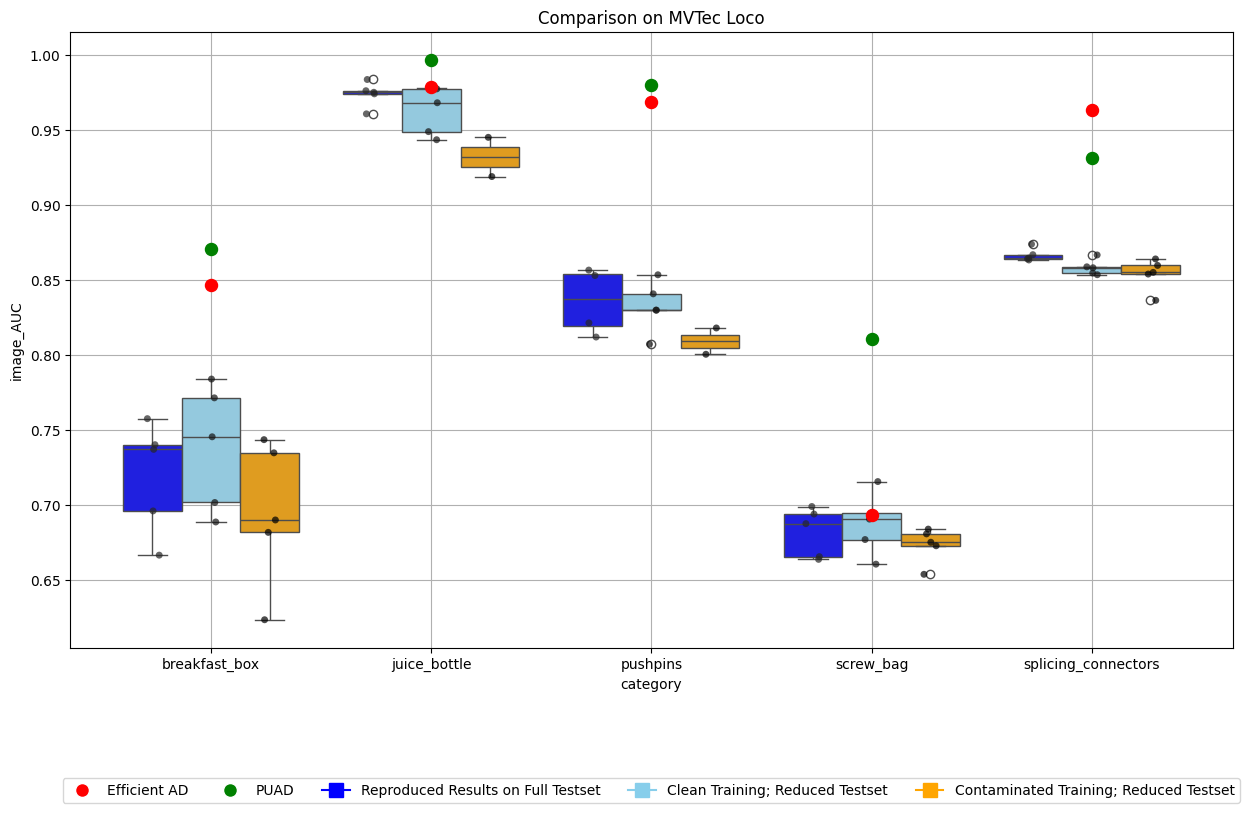

In [4]:

# exp_name= "Exp_20_06_24"
# category= "breakfast_box"
# root= '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/'

# with open('/home/bule/projects/UTRAD/configurations/mvtec_loco.json', 'r') as file:
#     conf_loco = json.load(file)
# print(list(conf_loco['anomaly_categories'].keys()))

# run=1
# logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')

# category_list= list(conf_loco['anomaly_categories'].keys())
# #category_list= ['breakfast_box', 'screw_bag']
# run_range= np.arange(1,6)

# res_df_cont=[]
# for category in category_list:
#     logfile_paths= []
#     for run in run_range:
#         logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')
#         if os.path.exists(logfile_path):
#             logfile_paths.append(logfile_path)
        
#     lastrow_df=last_rows_metric(logfile_paths)
#     lastrow_df['category']= [category]*len(lastrow_df)
#     res_df_cont.append(lastrow_df)
    
# res_df_cont= pd.concat(res_df_cont)


# res_df_cont['contamination']= ['10']*len(res_df_cont)
# res_df_cont['setting']= ['contaminated']*len(res_df_cont)




# res_df_end=pd.concat([res_df, res_df_cont])
# print(res_df_end.head())


################################### load 

plt.figure(figsize=(15, 8))

res_df_end = pd.read_pickle('/home/bule/projects/UTRAD/results/mvtec_loco/allresults/contaminated_vs_clean_box.pkl')
auc_EfficicentAD = {'breakfast_box': [0.8464],'juice_bottle': [0.9789],'pushpins': [0.9684],'screw_bag': [0.6936],'splicing_connectors':[0.9633]}
auc_PUAD = {'breakfast_box': [0.8707],'juice_bottle': [0.9968],'pushpins': [0.9802],'screw_bag': [0.8107],'splicing_connectors':[0.9312]}




exp_name= "Exp_20_06_24"
category= "breakfast_box"
root= '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/'

with open('/home/bule/projects/UTRAD/configurations/mvtec_loco.json', 'r') as file:
    conf_loco = json.load(file)
print(list(conf_loco['anomaly_categories'].keys()))



category_list= list(conf_loco['anomaly_categories'].keys())
#category_list= ['breakfast_box', 'screw_bag']
run_range= np.arange(1,6)

res_df_cont=[]
for category in category_list:
    logfile_paths= []
    for run in run_range:
        logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args_cleaned.log')
        if os.path.exists(logfile_path):
            if len(read_training_scores(logfile_path)['Loss'] )>=150:
                logfile_paths.append(logfile_path)
            
        
    lastrow_df=last_rows_metric(logfile_paths)
    lastrow_df['category']= [category]*len(lastrow_df)
    res_df_cont.append(lastrow_df)
    
res_df_cont= pd.concat(res_df_cont)


res_df_cont['contamination']= ['10']*len(res_df_cont)
res_df_cont['setting']= ['clean_reduced']*len(res_df_cont)


res_df_end=pd.concat([res_df_end, res_df_cont])

hue_order = ['clean', 'clean_reduced', 'contaminated']
palette = {
    'clean': 'blue',
    'clean_reduced': 'skyblue',
    'contaminated': 'orange'
}



ax = sns.boxplot(x="category", y="image_AUC", hue="setting", data=res_df_end,hue_order=hue_order,palette=palette)
sns.stripplot(data=res_df_end, x="category", y="image_AUC", hue="setting", dodge=True, alpha=.7, zorder=3, jitter=0.1, palette='dark:black', legend=False, ax=ax,hue_order=hue_order)


for category, auc in auc_EfficicentAD.items():
    ax.scatter(x=[category], y=auc, color='red', s=75, zorder=5)
for category, auc in auc_PUAD.items():
    ax.scatter(x=[category], y=auc, color='green', s=75, zorder=5)

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Efficient AD', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='PUAD', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='s', color='blue',  label='Reproduced Results on Full Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='skyblue', label='Clean Training; Reduced Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='orange', label='Contaminated Training; Reduced Testset', markersize=10)
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)

plt.title('Comparison on MVTec Loco')
plt.grid(True)

In [24]:
set(res_df_end['setting'])

{'clean', 'contaminated', 'contaminated_reduced'}

In [14]:
directories = [
'/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-breakfast_box','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-juice_bottle','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-pushpins','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-screw_bag','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-splicing_connectors','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-breakfast_box','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-juice_bottle','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-pushpins','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-screw_bag','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-splicing_connectors','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_3-breakfast_box','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_3-juice_bottle','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_3-pushpins','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_3-screw_bag','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_3-splicing_connectors','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_4-breakfast_box','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_4-juice_bottle','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_4-pushpins','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_4-screw_bag','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_4-splicing_connectors','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_5-breakfast_box','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_5-juice_bottle','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_5-pushpins','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_5-screw_bag','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_5-splicing_connectors']


rerun=[]
path_exist=[]
for path in [path+'/args_cleaned.log' for path in directories]:
    if os.path.exists(path):
        path_exist.append(path)
        if len(read_training_scores(path)['Loss'] )==150:
            rerun.append(path)
        
        
rerun



['/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-breakfast_box/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-juice_bottle/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-screw_bag/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-breakfast_box/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-juice_bottle/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-screw_bag/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_3-breakfast_box/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_3-juice_bottle/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_4-

In [ ]:
['/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-breakfast_box/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-juice_bottle/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-screw_bag/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-breakfast_box/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-juice_bottle/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-screw_bag/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_3-breakfast_box/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_3-juice_bottle/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_4-breakfast_box/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_4-juice_bottle/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_4-pushpins/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_5-breakfast_box/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_5-juice_bottle/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_5-pushpins/args_cleaned.log']

In [9]:
len(directories)

25

In [10]:
notlonglist=[]
for path in directories:
    if os.path.exists(path+'/Additional_Gausskernel.log'):
        notlonglist.append(path)
notlonglist

[]

In [11]:
import shutil
import os

# List of directories to remove
remove_dirs = []


# Function to remove directories
def remove_directories(dirs):
    for dir_path in dirs:
        if os.path.exists(dir_path):
            shutil.rmtree(dir_path)
            print(f"Removed directory and its contents: {dir_path}")
        else:
            print(f"Directory does not exist: {dir_path}")

# Remove the directories
remove_directories(remove_dirs)